# Clustring Algorithm 

## KMeans Cluster From Scratch

### Import Modules 

In [1]:
from array import array
import matplotlib.pyplot as plt
from math import inf   
import random  

### Define Basic Distance function

In [2]:
def euclidean_dist(v1, v2):
    if len(v1)!=len(v2) :
        raise Exception("Error : Vector Dimention does not match")
    dist = 0
    for i in range(len(v1)):
        dist+=(v1[i]-v2[i])**2
    return dist**.5
euclidean_dist([1,2,3],[2,0,-5])


8.306623862918075

### KMeans Cluster Model

In [3]:
class KMeansCluster(object):
    def __init__(self, k:int, *argc, **argv):
        self.k = k
        self.clusters = {f'cluster{i}':[] for i in range(self.k)}
        self.centroids = {f'cluster{i}':None for i in range(self.k)}      
    def __calculate_centroid(self,features):
        n=len(features[0])
        c = array('f',[0 for i in range(n)])
        l = list(zip(*features))
        for i in range(len(l)):
            c[i]=sum(l[i])/len(features)
        return c 
    def __iteration(self,features:list)->dict:
        clusters={f'cluster{i}':[] for i in range(self.k)}
        centroids={}
        for i in range(len(features)):
            dist = inf;index:str='';            
            for j in self.clusters:
                d = euclidean_dist(features[i],self.centroids[j])
                if d<dist:
                    dist=d;index = j
            clusters[index].append(features[i])     
        self.clusters = clusters
        for i in self.clusters:
            centroids[i]=self.__calculate_centroid(self.clusters[i])
        
        return centroids
    def __internal_mean_distance(self):
        d=0
        for clusterName in self.clusters:
            d2=0
            for i in self.clusters[clusterName]:
                d2+= euclidean_dist(i,self.centroids[clusterName])
            d+= d2/len(self.clusters[clusterName])
        return d/self.k

    def __external_mean_distance(self):
        d=0
        for i in self.clusters:
            d1 = 0
            for j in self.clusters:
                if i!=j:
                    d1+=euclidean_dist(self.centroids[i],self.centroids[j])
            d+= d1/(self.k-1)
        return d/self.k
    def __is_equal_vectors(self,v1,v2):
        return list(v1)==list(v2)

    def fit(self, features:list):

        external_mean_distance = []
        internal_mean_distance = []
        iter_no = 0
        sample = random.sample(features,self.k)
        curr_centroids = {f'cluster{i}':sample[i] for i in range(self.k)}         
        while not self.__is_equal_vectors(curr_centroids.values(), 
                                      self.centroids.values()):
            print("Iteration :%d"%iter_no)
            self.centroids = curr_centroids
            curr_centroids= self.__iteration(features)
            external_mean_distance.append(self.__external_mean_distance())
            internal_mean_distance.append(self.__internal_mean_distance())            
            iter_no+=1

        return (external_mean_distance,internal_mean_distance)


### Creating Datasets

In [4]:
data = [
    [1,0],[1,1],[2,1],[0,-1],[100,20],[102,19],[101,20],[25,21],[6,21],[23,25],[25,87],[0,-8],[2,6],[8,92],[10,-2],[1,11],[15,12],[21,29],[5,7],[71,2],[85,41],[47,98],[7,1],[99,99],[90,105],[101,36],[41,56],[26,35],[30,84],[41,56],[98,24],[74,89],[9,52]

        
]

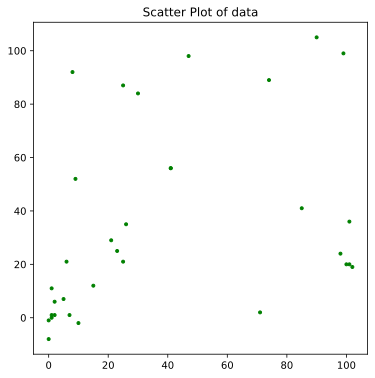

In [5]:
x,y= list(zip(*data))
fig,ax = plt.subplots(figsize = (6, 6))
ax.set_title("Scatter Plot of data")
s = ax.scatter(x,y, color='g',marker='.')
plt.show()


### Apply KMeans Cluster

In [7]:
model = KMeansCluster(4)
history = model.fit(data)

Iteration :0
Iteration :1
Iteration :2
Iteration :3
Iteration :4
Iteration :5
Iteration :6
Iteration :7
Iteration :8
Iteration :9


### Plotting Trainning History

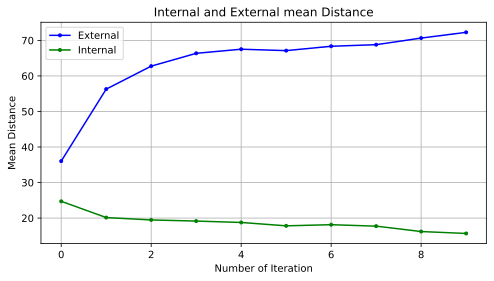

In [8]:
fig ,ax = plt.subplots(figsize=(8,4))
ax.set_title("Internal and External mean Distance")
ax.set_xlabel("Number of Iteration")
ax.set_ylabel("Mean Distance")
ax.plot(history[0], color='b',marker='.',label = 'External')
ax.plot(history[1], color='g',marker='.',label = 'Internal')
ax.legend();ax.grid()

